In [14]:
#number of transactions and volume of transaction per hour on 1st Jan 2018
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#create a new instance of the bigquery client
from google.cloud import bigquery

client = bigquery.Client()

#assign a variable to the query called query

query = """

SELECT
  o.hour AS HOUR, EXTRACT(year FROM o.datetime) as Year, EXTRACT(month FROM o.datetime) as Month, 
  EXTRACT(day FROM o.datetime) as Day, ROUND(SUM(o.output_price)*(0.00000001),2) AS BTC
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          3600000))) AS hour, TIMESTAMP_MILLIS(CAST((timestamp) AS INT64)) as datetime,
    output.output_satoshis AS output_price
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY o.hour,o.datetime
HAVING Year=2018 AND  Month=1 AND Day=1
order by BTC DESC, HOUR

"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
transaction = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
transaction.head(10)


,HOUR,Year,Month,Day,BTC
0,2018-01-01 00:00:00+00:00,2018,1,1,57976.05
1,2018-01-01 03:00:00+00:00,2018,1,1,39920.72
2,2018-01-01 04:00:00+00:00,2018,1,1,37063.56
3,2018-01-01 07:00:00+00:00,2018,1,1,34560.89
4,2018-01-01 11:00:00+00:00,2018,1,1,32748.66
5,2018-01-01 18:00:00+00:00,2018,1,1,31407.40
6,2018-01-01 09:00:00+00:00,2018,1,1,30691.95
7,2018-01-01 12:00:00+00:00,2018,1,1,28234.16
8,2018-01-01 17:00:00+00:00,2018,1,1,27172.12
9,2018-01-01 11:00:00+00:00,2018,1,1,26934.53


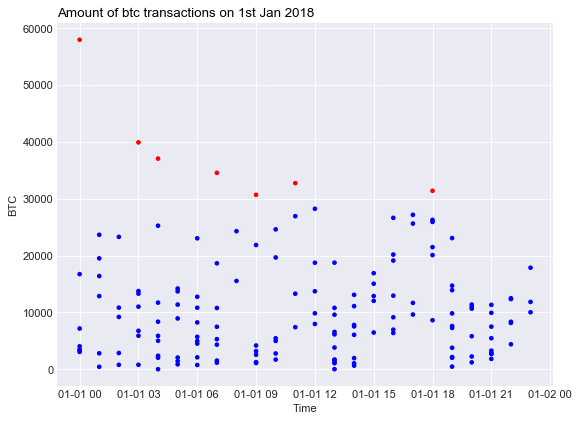

In [19]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
dates = [pd.to_datetime(d) for d in transaction.HOUR]
x=dates
y=transaction.BTC
plt.style.use('seaborn-darkgrid')
plt.title("Amount of btc transactions on 1st Jan 2018", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Time")
plt.ylabel("BTC")
my_color=np.where(transaction.BTC>= 30000, 'red', 'blue')
plt.scatter(x,y, color=my_color, s=10, alpha=1)
plt.show()

In [5]:
#volume of transaction(BTC) each hour (1 Sathoshi=0.00000001 BTC)
query = """

SELECT
  o.hour AS HOUR,
  SUM(o.output_price)*(0.00000001) AS BTC
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          3600000))) AS hour,
    output.output_satoshis AS output_price
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY
  o.hour
  order by o.hour DESC
"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
count = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
count.head(10)


,HOUR,BTC
0,2018-09-10 13:00:00+00:00,25576.661692
1,2018-09-10 12:00:00+00:00,26780.708008
2,2018-09-10 11:00:00+00:00,49676.100145
3,2018-09-10 10:00:00+00:00,30626.022829
4,2018-09-10 09:00:00+00:00,33139.407638
5,2018-09-10 08:00:00+00:00,47707.790985
6,2018-09-10 07:00:00+00:00,42482.652673
7,2018-09-10 06:00:00+00:00,52215.922252
8,2018-09-10 05:00:00+00:00,45731.868841
9,2018-09-10 04:00:00+00:00,29574.324552


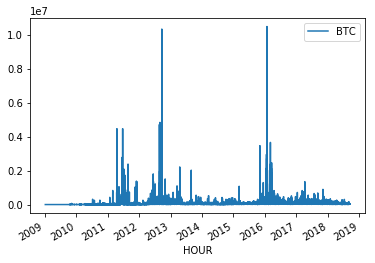

In [6]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
count.plot(x='HOUR', y='BTC')

In [7]:
#checking for volume of btc transactions day vs night

query = """

SELECT
  o.hour AS HOUR,EXTRACT(HOUR FROM o.datetime)<11 OR EXTRACT(HOUR FROM o.datetime)>23 AS NIGHT,
  EXTRACT(HOUR FROM o.datetime) BETWEEN 11 AND 23 AS DAYLIGHT,
  ROUND(SUM(o.output_price)*(0.00000001),2) AS BTC
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          3600000))) AS hour, TIMESTAMP_MILLIS(CAST((timestamp) AS INT64)) as datetime,
    output.output_satoshis AS output_price
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY o.hour,o.datetime 
order by BTC DESC

"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
tm = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
tm.head(100)


,HOUR,NIGHT,DAYLIGHT,BTC
0,2016-01-24 02:00:00+00:00,True,False,6499349.80
1,2016-01-24 04:00:00+00:00,True,False,5691062.07
2,2016-01-25 03:00:00+00:00,True,False,5228347.04
3,2016-01-24 11:00:00+00:00,False,True,5204155.87
4,2012-09-21 22:00:00+00:00,False,True,4499738.89
5,2016-01-24 22:00:00+00:00,False,True,4376041.96
6,2011-04-20 03:00:00+00:00,True,False,4005588.48
7,2012-08-24 23:00:00+00:00,False,True,3783011.63
8,2016-01-24 20:00:00+00:00,False,True,3641530.72
9,2016-01-24 13:00:00+00:00,False,True,3584749.36


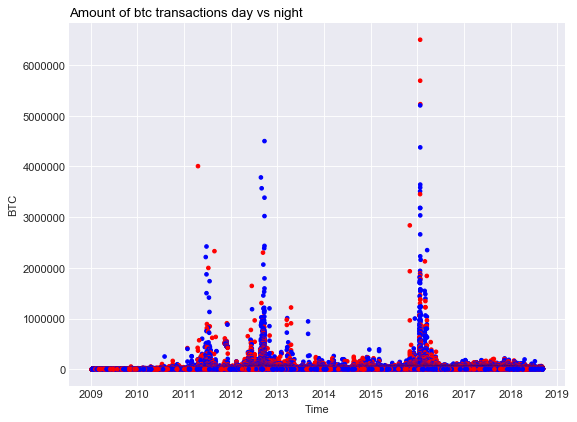

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
dates = [pd.to_datetime(d) for d in tm.HOUR]
x=dates
y=tm.BTC
plt.style.use('seaborn-darkgrid')
plt.title("Amount of btc transactions day vs night", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Time")
plt.ylabel("BTC")
my_color=np.where(tm.NIGHT ==True, 'red', 'blue')
plt.scatter(x,y, color=my_color, s=10, alpha=1)
plt.show()




In [9]:
#checking for volume of btc transactions weekdays vs weekends.

query = """


SELECT
  o.hour AS HOUR,EXTRACT(HOUR FROM o.datetime)<11 OR EXTRACT(HOUR FROM o.datetime)>23 AS NIGHT,
  EXTRACT(HOUR FROM o.datetime) BETWEEN 11 AND 23 AS DAYLIGHT, (EXTRACT(DAYOFWEEK FROM o.datetime)=7 or EXTRACT(DAYOFWEEK FROM o.datetime)=1) AS Weekend,
  ROUND(SUM(o.output_price)*(0.00000001),2) AS BTC
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          3600000))) AS hour, TIMESTAMP_MILLIS(CAST((timestamp) AS INT64)) as datetime,
    output.output_satoshis AS output_price
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY o.hour,o.datetime 
order by BTC DESC
LIMIT 100

"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
wk = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
wk.head(100)

,HOUR,NIGHT,DAYLIGHT,Weekend,BTC
0,2016-01-24 02:00:00+00:00,True,False,True,6499349.80
1,2016-01-24 04:00:00+00:00,True,False,True,5691062.07
2,2016-01-25 03:00:00+00:00,True,False,False,5228347.04
3,2016-01-24 11:00:00+00:00,False,True,True,5204155.87
4,2012-09-21 22:00:00+00:00,False,True,False,4499738.89
5,2016-01-24 22:00:00+00:00,False,True,True,4376041.96
6,2011-04-20 03:00:00+00:00,True,False,False,4005588.48
7,2012-08-24 23:00:00+00:00,False,True,False,3783011.63
8,2016-01-24 20:00:00+00:00,False,True,True,3641530.72
9,2016-01-24 13:00:00+00:00,False,True,True,3584749.36


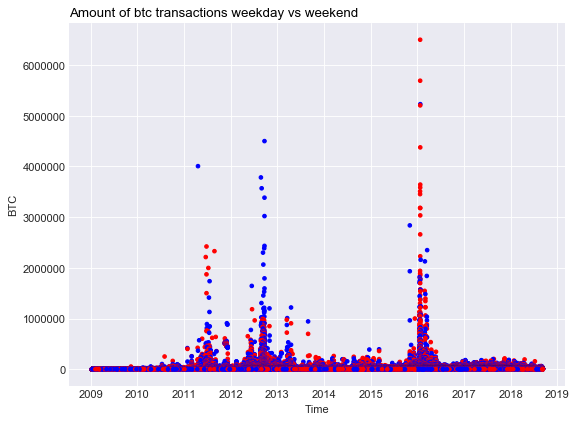

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
dates = [pd.to_datetime(d) for d in tm.HOUR]
x=dates
y=tm.BTC
plt.style.use('seaborn-darkgrid')
plt.title("Amount of btc transactions weekday vs weekend", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Time")
plt.ylabel("BTC")
my_color=np.where(wk.Weekend ==True, 'red', 'blue')
plt.scatter(x,y, color=my_color, s=10, alpha=1)
plt.show()
